In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import pandas as pd

# Data Preparation Sprint Challenge

Data preparation can be an arduous process with many steps. These following challenges were all gone over in class.

There are six objectives in Data Preparation:

* select
* filter
* treat
* de-duplicate
* concatenate
* transform

There are three objectives in Data Visualization

* Draw an oblique topology
* Pairplot to find clusters
* Plot clusters together

Share with mlsubmissions@lambdaschool.com when finished.

# Select

Load `https://www.dropbox.com/s/xcqdya9svj04kwc/example4.csv?raw=1` and remove any rows that are not data samples.

Print your result and its dimensions.

I will use the incredibly powerful and versatile [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) pandas function to load the data.

In [2]:
raw_data = pd.read_csv('https://www.dropbox.com/s/xcqdya9svj04kwc/example4.csv?raw=1')
raw_data

,# hey!,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,a,b,c,d,message
1,# just wanted to make things more difficult fo...,NaN,NaN,NaN,NaN
2,# who reads CSV files with computers,anyway?,NaN,NaN,NaN
3,1,2,3,4,hello
4,5,6,7,8,world
5,9,10,11,12,foo


It appears that there are comments preceded by a `#` symbol. By default, `pd.read_csv` will use the first row as column labels, but since the first row contains a comment, it is including the intended column labels as the first row of data entries, leaving the dataframe with many unnamed columns.

This problem can be alleviated by setting the `comment` argument.

In [3]:
data = pd.read_csv('https://www.dropbox.com/s/xcqdya9svj04kwc/example4.csv?raw=1', comment='#')
print("Dimensions of data: {} rows, {} columns".format(data.shape[0], data.shape[1]))
data

Dimensions of data: 3 rows, 5 columns


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


# Filter

Only access the rows or columns of a pandas `DataFrame` that you want.

Load `https://www.dropbox.com/s/xcqdya9svj04kwc/example5.csv?raw=1` for these examples.

In order to use integer-based indexing and slicing, the [`.iloc`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) attribute of pandas DataFrames can be used.

When returning a slice of a dataframe, the first axis specfies the rows; the second, the columns. Indexing into a single column simply by specifying its integer location along the appropriate axis will return a pandas [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), while providing a range (e.g. `example_dataframe[:,1:2]`) will return a DataFrame. This same behavior is produced by using single, or double square brackets when indexing into a DataFrame by column name.

I choose to return DataFrames rather than Series. Also, I use a separate cell for each selection in order to take advantage of the formatting provided by IPython notebooks. Note that this implies that I omit the `print` call.

__Warning:__ sometimes `.loc` can provide the results intended, but only in the case that the row-labels for a dataframe match their 0-indexed integer values. Do not make the mistake of thinking this is the method for the job!

In [4]:
# Print only the third column

data.iloc[:,2:3]

,c
0,3
1,7
2,11


In [5]:
# Print columns 'a' and 'message'

data[['a', 'message']]

,a,message
0,1,hello
1,5,world
2,9,foo


In [6]:
# Print the first row

data.iloc[0:1]



,a,b,c,d,message
0,1,2,3,4,hello


In [7]:
# Print the first and third rows

data.iloc[0:3:2]

,a,b,c,d,message
0,1,2,3,4,hello
2,9,10,11,12,foo


# Treat

Load `https://www.dropbox.com/s/9cljswede6r25ho/example5.csv?raw=1` for these examples


As before, I will first examine the raw data returned by `read_csv` in order to determine whether special considerations while selecting data are required.

In [8]:
data2 = pd.read_csv('https://www.dropbox.com/s/9cljswede6r25ho/example5.csv?raw=1')
data2

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


I am satisfied with the DataFrame produced, and deem no additional arguments to `read_csv` necessary.

The pandas [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) function, when passed a DataFrame as its argument, will return a DataFrame of the same shape in which each element is a boolean value, indicating whether the corresponding element in the query DataFrame is some form of null value, such as a `NaN`. The number of true values per column could then be counted.

An alternative approach is to use the [`.count`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html) DataFrame method. Quoting the documentation, it "return Series with number of non-NA/null observations over requested axis." The number of null observations would therefore be the difference between the dimension of that axis and its count.

In [9]:
# Print the sum of NaN values in each column

data2.shape[0] - data2.count()

something    0
a            0
b            0
c            1
d            0
message      1
dtype: int64

The Dataframe `.any` method can be used on the DataFrame produced by `isnull` in order to determine whether each column (or row, depending on the axis specified) contains a null value. Note that the usual axis ordering conventions here is reversed, `axis=0` will have the method look through columns for one or more `True` values, while `axis=1` will have the method look through rows.

In [10]:
# Drop all ROWS that contain NaN and print the result

print(data2.isnull().any(axis=1))

0     True
1     True
2    False
dtype: bool


Rows or columns can be dropped from DataFrames using the [`.drop`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) method.

We can use what we printed above to directly drop rows 0, and 1. However, in order to make the solution generalizable to DataFrames with many rows containing NaN, I will reuse the code and produce a more programmatic solution.

__Important:__ the `inplace` argument, which defaults to `False` determines whether `.drop` returns a new DataFrame, which therefore must be assigned to a variable for further use, or mutates the DataFrame inplace. If `inplace=True`, or if one is assigning the result of the `.drop` operation to the same variable name as that bound to the DataFrame the operation is being performed on, then exceptions will arise if one runs the code repeatedly, raised by attempting to drop rows or columns from a DataFrame that do not exist as a part of it.

In [11]:
# we can either use what we observed above

null_rows_indices = [i for i in range(data2.shape[0]) if data2.isnull().any(axis=1).iloc[i]]
data2_dropped_rows = data2.drop(null_rows_indices, axis=0)
data2_dropped_rows

,something,a,b,c,d,message
2,three,9,10,11.0,12,foo


The `.fillna` DataFrame method is an extremely versatile way to fill null values. It allows for any particular value to be set as the fill value, which opens up the possibility for very intelligently selected values such as the median or mean, or even just arbitrary values. Alternatively, common strategies for filling null values, such as using the value in the previous row of the same column, or the value in the next row, can be used by setting the `method` argument.

Note that this method also contains an `inplace` argument, but it poses less dangers because the method repeated multiple times does not accumulate additional effects (null values will only be filled once!)

In [12]:
# Replace all cells containing NaN using .fillnna

data2_filled = data2.fillna(method='bfill')
data2_filled

,something,a,b,c,d,message
0,one,1,2,3.0,4,world
1,two,5,6,11.0,8,world
2,three,9,10,11.0,12,foo


# De-Duplicate

Load `https://www.dropbox.com/s/5m89vi5qgu4g2cd/duped.csv?raw=1` for the following

In [13]:
data3 = pd.read_csv('https://www.dropbox.com/s/5m89vi5qgu4g2cd/duped.csv?raw=1')
data3

,a,b,c
0,1,2,3
1,1,1,1
2,1,2,3
3,1,0,3
4,3,3,3
5,3,3,3
6,3,3,1


[`.drop_duplicates`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html) will drop duplicate rows, keeping their first occurence by default.

In [14]:
# Print the contents of the dataframe after having dropped all duplicate rows

data3_dedup = data3.drop_duplicates()
data3_dedup

,a,b,c
0,1,2,3
1,1,1,1
3,1,0,3
4,3,3,3
6,3,3,1


# Concatenate

Merge the Titanic and OKC datasets by `age` using `pd.merge` and the `on` argument.

The data lends itself well to an inner join, in which the `alive` values corresponding to a certain age will be joined together with the corresponding `name` values associated with the same age. Since there are no ages in one DataFrame that are not in the other, there will be no NaNs produced.

In [15]:
Titanic = pd.DataFrame({
    'age': [29, 24, 23, 38, 48, 44],
    'name': ['alpha', 'nu', 'gamma', 'psi', 'theta', 'rho']
})
OKC = pd.DataFrame({
    'age': [48, 44, 38, 29, 24, 23],
    'alive': [False, True, False, True, False, True]
})

# Merge and print the result
merged = Titanic.merge(OKC, on='age')
merged

,age,name,alive
0,29,alpha,True
1,24,nu,False
2,23,gamma,True
3,38,psi,False
4,48,theta,False
5,44,rho,True


# Transform

Use `groupby` to separate the following dataframe by `speed`.

The result of the [`.groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) method is a `GroupBy` object. For our purposes, this object has two important properties to note:

* It has many aggregation methods such as `.mean` and `.average` that can be used to produce a DataFrame displaying these values grouped by whatever categories defined the `GroupBy` object to begin with.
* It is an [iterable](https://docs.python.org/3/glossary.html#term-iterable), and can thus be used in a `for` loop, as an argument to `enumerate`, among other things. Each element a tuple, where the first element is the value of the particular column that the data entries are being grouped by, and the second element is a DataFrame containing the rows sharing the value given in the first element of the tuple.

In [16]:
Rockets = pd.DataFrame({
   'speed': ['fast', 'fast', 'fast', 'slow', 'slow'],
   'engine': ['XX9', '24-Bravo', 'Lambda Nu', 'X1', 'XX8'],
   'name': ['Musky', 'NASO', 'COSMO', 'Zucc', 'Dragon egg']
})

# `groupby` and store the result.
Rockets_by_speed = Rockets.groupby('speed')
# Iterate over each result and print it on its own line/s
for speed in Rockets_by_speed:
    print(speed[1], '\n')

      engine   name speed
0        XX9  Musky  fast
1   24-Bravo   NASO  fast
2  Lambda Nu  COSMO  fast 

  engine        name speed
3     X1        Zucc  slow
4    XX8  Dragon egg  slow 



# Draw an oblique topography

The Mexican Hat Filter or Laplacian of Gaussian is used for cleaning up noisy 2d data, such as in images. It makes a pretty cool 3d graph.

Plot the filter that is returned by the defined function. The range of the function as defined should be interesting in a domain of approximately -1 to 1

In order to plot the surface of a function of two variables, I will first create a meshgrid over the domain of the function using [`np.meshgrid`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html). Then for each pair of corresponding elements of the two arrays of domain variables produced by this, I will produce store the value of the function at that point in a new array. This operation can be vectorized with [`np.vectorize`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html)

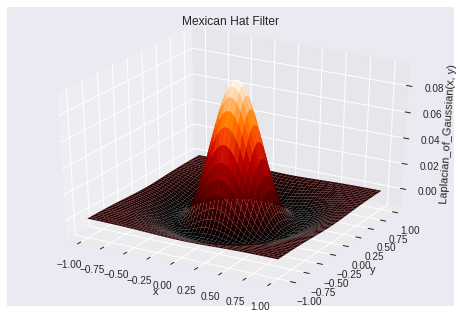

In [17]:
def laplacian_of_gaussian(x,y):
    sigma = 0.3
    return 1/np.pi*sigma * (1-0.5*((x**2 + y**2)/sigma**2)) * np.exp(-((x**2+y**2)/(2*sigma**2)))

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# get vectorized function
laplacian_of_gaussian_vec = np.vectorize(laplacian_of_gaussian)

# define domain
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)

# create meshgrid
X, Y = np.meshgrid(x, y)

# get function outputs
Z = laplacian_of_gaussian_vec(X, Y)

# plot topology 
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
               cmap='gist_heat', edgecolor=None)
ax.set(xlabel='x', ylabel='y', zlabel='Laplacian_of_Gaussian(x, y)', title='Mexican Hat Filter');

# Pairplot to find clusters

Clusters have a normal shape along each axis. Pairplot the following data and manually print which axes are normal.

Read your data from `https://www.dropbox.com/s/ziqwkm163ih96v0/sprint_challenge_data.csv?raw=1`

In [18]:
data4 = pd.read_csv('https://www.dropbox.com/s/ziqwkm163ih96v0/sprint_challenge_data.csv?raw=1')
data4.head()

,Unnamed: 0,na,nb,lx,ly,r,ny,nx
0,0,-3.518547,2.415363,23.0,23.444392,0.483178,-2.686564,3.796670
1,1,-2.269976,2.162808,37.0,37.836192,0.230229,-1.731095,2.113713
2,2,-2.602120,2.182037,9.0,9.667870,0.585964,-4.323667,1.897872
3,3,-2.456000,2.583895,28.0,29.091804,0.611946,-1.100922,1.974076
4,4,-3.765145,1.751981,46.0,46.196449,0.278789,-2.275263,2.868828


Let's clean our data a little bit. It looks like the first column is intended to be used as the row index, so I will read the data again with this in mind. In addition, I will quickly look at the shape of the DataFrame and see if it contains missing values.

In [19]:
data4 = pd.read_csv('https://www.dropbox.com/s/ziqwkm163ih96v0/sprint_challenge_data.csv?raw=1', index_col=[0])
print("Dimensions of data: {} rows, {} columns".format(data4.shape[0], data4.shape[1]))
data4.head()

Dimensions of data: 50 rows, 7 columns


,na,nb,lx,ly,r,ny,nx
0,-3.518547,2.415363,23.0,23.444392,0.483178,-2.686564,3.796670
1,-2.269976,2.162808,37.0,37.836192,0.230229,-1.731095,2.113713
2,-2.602120,2.182037,9.0,9.667870,0.585964,-4.323667,1.897872
3,-2.456000,2.583895,28.0,29.091804,0.611946,-1.100922,1.974076
4,-3.765145,1.751981,46.0,46.196449,0.278789,-2.275263,2.868828


So that I get additional information from the two halves of the pairplot, I will use a scatterplot on one end, and a contour plot on the other. For the diagonal, I will visualize the distribution of each individual dimension using a [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


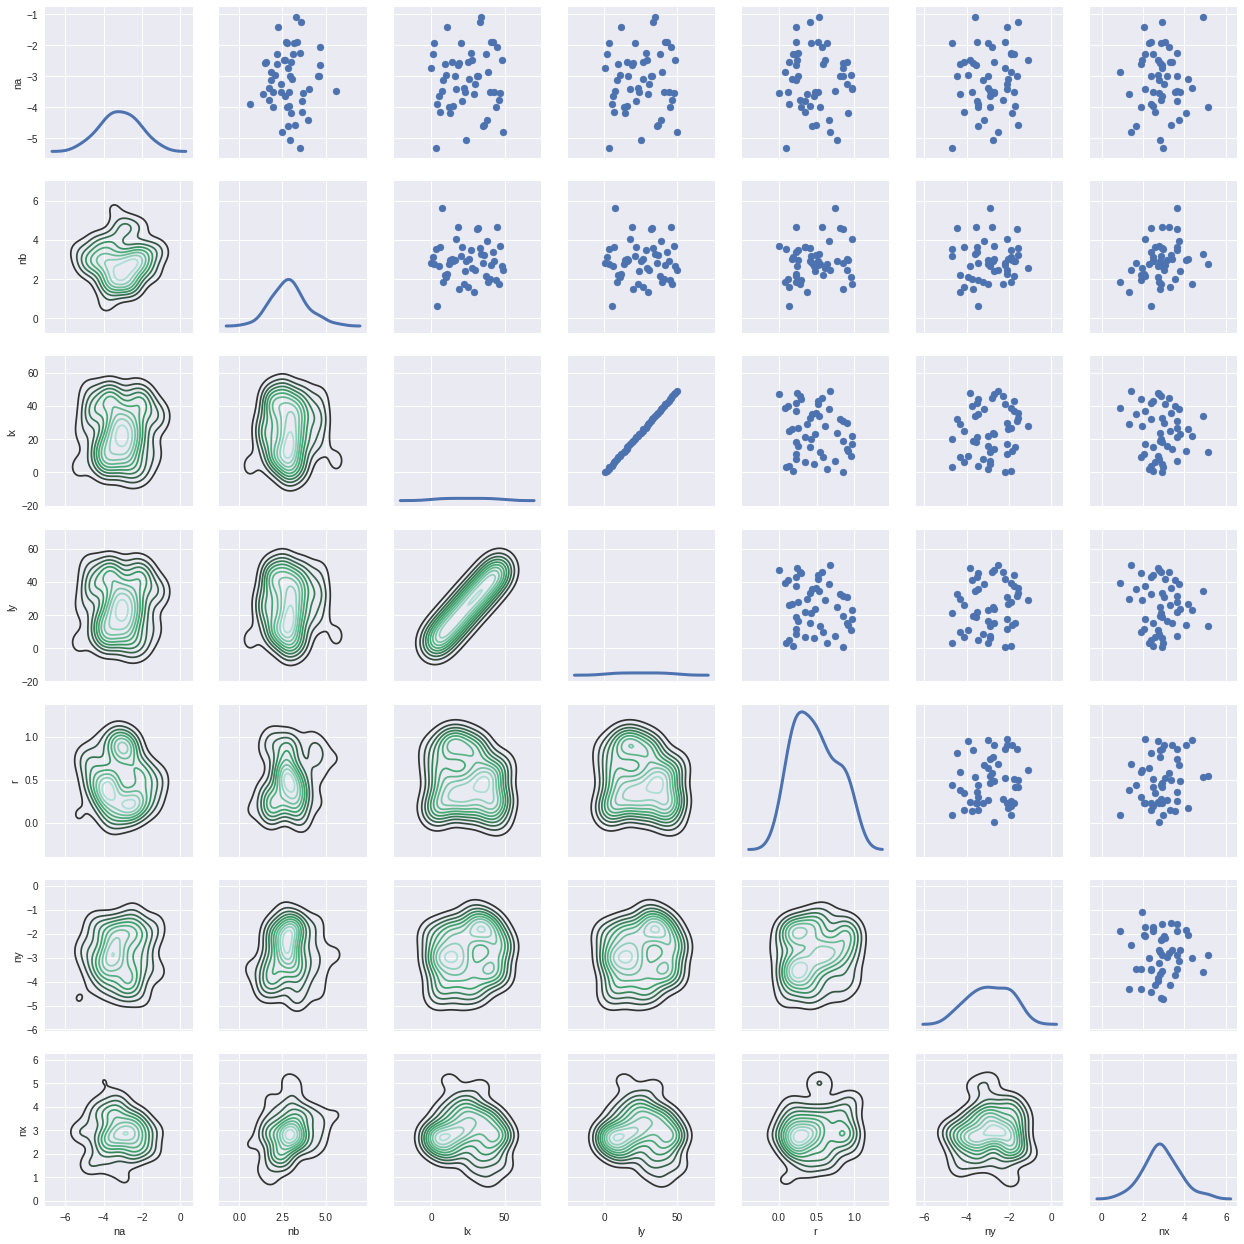

In [20]:
import seaborn as sns

# Pairplot via seaborn

g = sns.PairGrid(data4)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=3, legend=False);

It appears that two of the dimensions are directly proportional to each other, and that the others are normally distributed. I'll use a correlation heatmap to develop these insights.

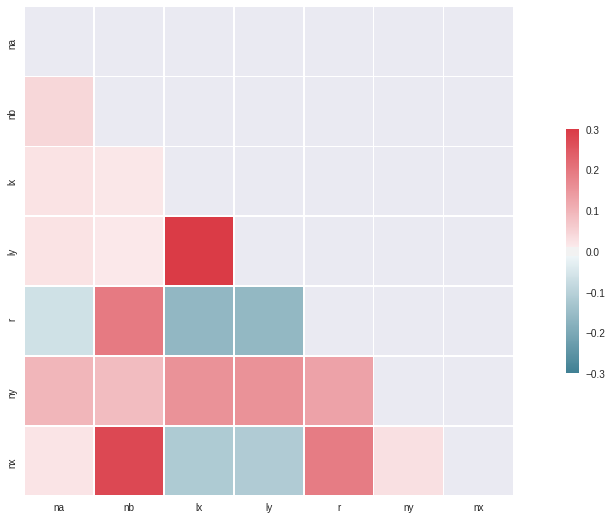

In [21]:
# Compute the correlation matrix
corr = data4.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [22]:
corr

,na,nb,lx,ly,r,ny,nx
na,1.000000,0.042532,0.024422,0.024034,-0.061336,0.096592,0.023292
nb,0.042532,1.000000,0.018546,0.014562,0.195416,0.087728,0.275089
lx,0.024422,0.018546,1.000000,0.999808,-0.163701,0.156025,-0.115646
ly,0.024034,0.014562,0.999808,1.000000,-0.161022,0.155254,-0.114593
r,-0.061336,0.195416,-0.163701,-0.161022,1.000000,0.129229,0.191842
ny,0.096592,0.087728,0.156025,0.155254,0.129229,1.000000,0.028425
nx,0.023292,0.275089,-0.115646,-0.114593,0.191842,0.028425,1.000000


### Analysis:

* `lx` and `ly` are directly proportional. In other words, one can be thought of as a linear function of the other.
* `nb` and `nx` are correlated. This suggests that they were sampled from a multivariate Gaussian distribution with nonzero off-diagonals in its covariance matrix.
* Based on the fact that they have similar means and variances, it makes sense to say that `na` and `ny` were sampled from a multivariate Gaussian distribution with a diagonal covariance matrix.
* `r` appears to simply be a random variable sampled from a univariate Gaussian distribution with a mean of about 0.5.

---

However, since individual dimensions with normal distributions can have multiple interpretations if it is known that they belong to 2D clusters, there is an alternative explanation:

* `nb` and `ny` were sampled from a multivariate Gaussian distribution.
* `nb` and `nx` were sampled from a second distribution.
* The two distributions are linearly separable, and the line given by `lx` and `ly` is one such separator.

I will use the first interpretation when plotting the clusters, since the points that are roughly in a line are on a completely different length scale than the clusters.

# Plot clusters together

You found the clusters. Draw them on the same graph.

I will make use of some of the functions for creating annotations described in this [matplotlib showcase example](https://matplotlib.org/examples/showcase/anatomy.html).

In [0]:
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

def circle(x, y, radius=0.15):
    circle = Circle((x, y), radius, clip_on=False, zorder=1, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=3, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text,
            ha='center', va='top', weight='bold', color='black')

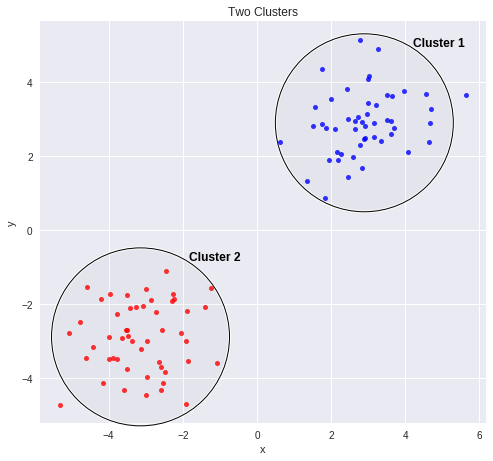

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

# Annotation for cluster 1
x, y = data4['nb'].mean(), data4['nx'].mean()
circle(x, y, 2.4)
text(x+2, y+2.3, "Cluster 1")

# Annotation for cluster 2
x, y = data4['na'].mean(), data4['ny'].mean()
circle(x, y, 2.4)
text(x+2, y+2.3, "Cluster 2")

# Plot clusters
ax.plot(data4['nb'], data4['nx'], 'bo', markersize=5, alpha=0.8)
ax.plot(data4['na'], data4['ny'], 'ro', markersize=5, alpha=0.8)

ax.set(xlabel='x', ylabel='y', title='Two Clusters');